In [19]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [21]:
def addSaltPeperNoise(image, saltRatio, pepperRatio):
    noisyImage = image.copy()
    numOfPixels = image.size
    numOfSaltPixels = int(saltRatio * numOfPixels)
    numOfPepperPixels = int(pepperRatio * numOfPixels)

    for i in range(numOfSaltPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 255
    
    for i in range(numOfPepperPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 0

    return noisyImage

In [22]:
def hermonicMean(image, kernelSize = 2):
    filteredImage  = np.zeros_like(image)
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    for i in range (padSize, image.shape[0] + padSize):
        for j in range(padSize, image.shape[1] + padSize):
            window = paddedImage[i - padSize: i+padSize+1, j - padSize: j+padSize+1]

            pixel = 0
            for r in range(window.shape[0]):
                for k in range(window.shape[1]):
                    pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k]

            pixel = kernelSize ** 2 / pixel

            if pixel > 255:
                pixel = 255

            filteredImage[i-padSize, j-padSize]= pixel
    return filteredImage

In [23]:
def harmonic_mean_filter(image, mask_size):
    # Create a kernel with all elements equal to 1
    kernel = np.ones((mask_size, mask_size), dtype=np.float32) / (mask_size ** 2)

    # Apply the filter using cv2.filter2D
    filtered_image = cv2.filter2D(image.astype(np.float32), -1, kernel)

    # Avoid division by zero
    filtered_image = np.divide(1, filtered_image, out=np.zeros_like(filtered_image), where=(filtered_image != 0))

    # Normalize the image
    filtered_image = (filtered_image / np.max(filtered_image) * 255).astype(np.uint8)

    return filtered_image

In [24]:
# Peak Signal-to-Noise Ratio
def calcPNSR(image1, image2):  
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2)   # Mean Squared Error (MSE)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)

    print(f"comute pnsr: {20 * np.log10(255.0 / np.sqrt(mse))}")
    
    return round(psnr, 2)

comute pnsr: 9.690304087706586
padded image [[  0   0   0 ...   0   0   0]
 [  0 229   0 ... 229 229   0]
 [  0   0 229 ... 229 229   0]
 ...
 [  0 229   0 ... 229 229   0]
 [  0 229 229 ... 229 229   0]
 [  0   0   0 ...   0   0   0]]
window: [[  0   0   0]
 [  0 229   0]
 [  0   0 229]]
window: [[  0   0   0]
 [229   0 255]
 [  0 229 229]]
window: [[  0   0   0]
 [  0 255 229]
 [229 229 229]]
window: [[  0   0   0]
 [255 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: [[  0   0   0]
 [229 229 229]
 [229 229 229]]
window: 

C:\Users\Fahim Ahammed Firoz\AppData\Local\Temp\ipykernel_12748\2391017661.py:17: RuntimeWarning: divide by zero encountered in divide
  pixel += 0 if np.isinf(1/window[r, k]) else 1/window[r, k]


window: [[229 229   0]
 [229   0 229]
 [229 229 229]]
window: [[229   0 229]
 [  0 229 229]
 [229 229 229]]
window: [[  0 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229   0]
 [229 229 229]
 [229 229 229]]
window: [[229   0 229]
 [229 229 229]
 [229 229 229]]
window: [[  0 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229   0]
 [229 229 229]]
window: [[229 229 229]
 [229   0 229]
 [229 229 229]]
window: [[229 229 229]
 [  0 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229   0]
 [229 229 229]]
window: [[229 229 229]
 [229   0 229]
 [229 229 229]]
window: [[229 229 229]
 [  0 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229 229]
 [229 229 229]
 [229 229 229]]
window: [[229 229   0]
 [229

ZeroDivisionError: division by zero

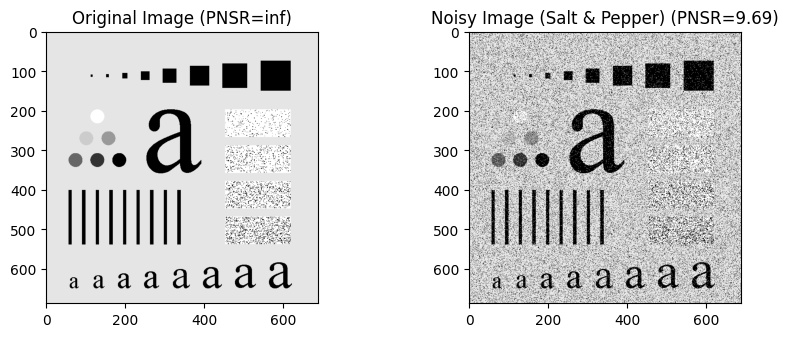

In [25]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPNSR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(3, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={calcPNSR(originalImage, noisyImage)})")

averageFilteredImage = hermonicMean(noisyImage, 3)
plt.subplot(3, 2, 3)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Hermonic Mean filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)})")

averageFilteredImage = harmonic_mean_filter(noisyImage, 3)
plt.subplot(3, 2, 4)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Hermonic Mean filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)})")

